# Titanic dataset Analysis
Predict the survival of the passengers.
We will use logistic regression algorithm



In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

In [80]:
#Loading the data set
df = pd.read_csv('titanic_train.csv')

# Exploratory Data Analysis
Here, we will explore the data to understand the state of data. This step is similar to data profiling. The main aim here will be to check for:
    - Null values
    - Missing values
    - Check redundant data
    - Understand hidden patterns in data
Post which we can proceed with rectifying the data in our Feature engineering step.

In [81]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [83]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From here we can see the mean and std deviation of some important features like Age, fare etc.

In [84]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [85]:
#checking null value count for each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# we can say that majority of null values is present in Age and cabin column.
- Lets see the same using a heatmap plot

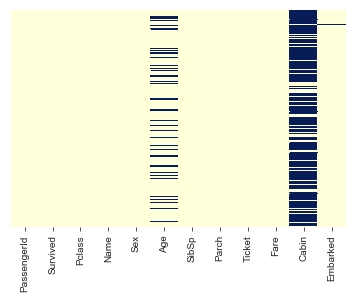

In [86]:
# checking Missing values using heatmap 
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap="YlGnBu")

we can see that majority of null values are in two features only namely Age and Cabin

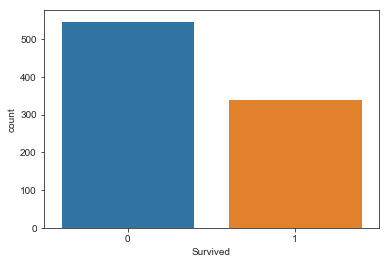

In [87]:
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.countplot(x='Survived',data=df)

Here we can see how many people survived in the data we have.
- we can infer that the number of person who *survived is less* than the number of persons who couldnot survive

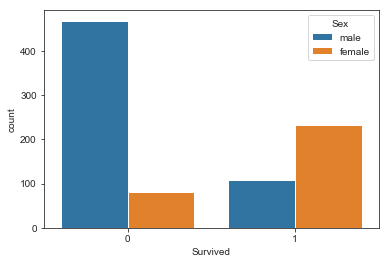

In [88]:
sns.countplot(x='Survived',hue='Sex',data=df)

- Number of male survided < Number of women survived. This indicates that women were given prefrence.

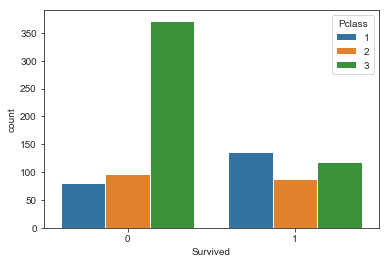

In [89]:
sns.countplot(x='Survived',hue='Pclass',data=df)

- We can infer that the number of people wo survived belonged majorly from the 1st class.
- And the majority who could not survive were from 3rd class.
- based on analysis so far we can say that people who survived were women from the ist class.

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


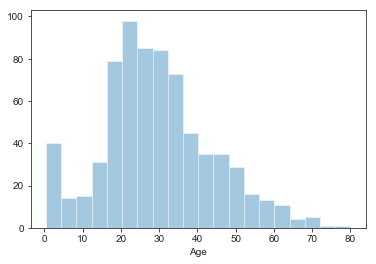

In [90]:
sns.distplot(df['Age'].dropna(),kde=False)

- From the data description we found that Age column had null values so we droped the null rows in Age and ploted a dist graph to understand it more.

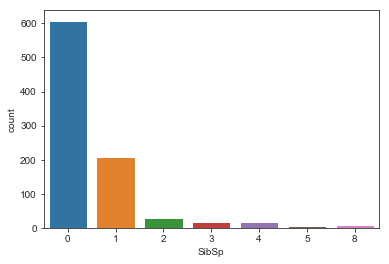

In [91]:
sns.countplot(x='SibSp',data=df)

- We can see the number of siblings or spuse travelling togather.
- Majority of the people were traveling alone.

# Handling null values for Age column

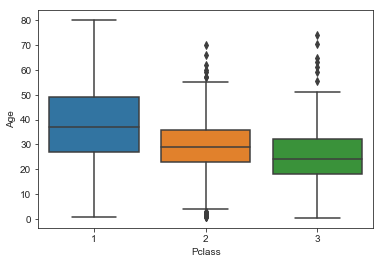

In [92]:

sns.boxplot(x='Pclass',y='Age',data=df)

-When we breakdown further using box plot for the Age vs Pclass, we can infer:
    - People in 1st class were relatively older.
    - People in second and 3rd class a relatively younger.

Lets code with providing the age for null values and then see it using the heatmap.

In [93]:
def replace_age(x):
    Age=x[0]
    Pclass=x[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return x

In [94]:
df['Age'] = df[['Age','Pclass']].apply(replace_age,axis=1)

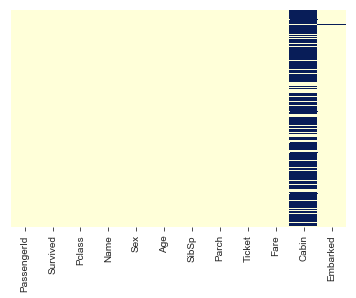

In [95]:
# checking Missing values using heatmap 
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap="YlGnBu")

In [96]:
df.drop('Cabin',axis=1,inplace=True)

In [97]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [98]:
#applying numerical values for Sex column
sex= pd.get_dummies(df['Sex'],drop_first=True)

In [99]:
#converting numerical values for embarked column
embarked=pd.get_dummies(df['Embarked'],drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [100]:
#converting numerical values for pclass column
pclass=pd.get_dummies(df['Pclass'],drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [101]:
#concatenating the 3 columns above to the master data set
df=pd.concat([df,sex,embarked,pclass],axis=1)

In [102]:
#Now lets drop all unwanted columns
df.drop(['PassengerId','Pclass','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [103]:
df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


This is the Data that we will pass to the model and will do our prediction for survival.

# Train test split, Model Creation and accuracy check

In [106]:
x=df.drop('Survived',axis=1)#Independent variable
y=df['Survived']#Dependent variable

In [107]:
from sklearn.cross_validation import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
logmodel=LogisticRegression()

In [112]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [113]:
predict=logmodel.predict(X_test)

In [115]:
from sklearn.metrics import classification_report

In [116]:
classification_report(y_test,predict)

'             precision    recall  f1-score   support\n\n          0       0.77      0.88      0.82       153\n          1       0.80      0.64      0.71       115\n\navg / total       0.78      0.78      0.78       268\n'

In [117]:
from sklearn.metrics import confusion_matrix

In [118]:
confusion_matrix(y_test,predict)

array([[135,  18],
       [ 41,  74]], dtype=int64)

In [119]:
from sklearn.metrics import accuracy_score

In [120]:
accuracy_score(y_test,predict)

0.7798507462686567